# GARCH Stock Forecasting - Volatility

## Read Data

In [229]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from arch import arch_model
from time import time

In [230]:
df = pd.read_csv("./brent_data.csv")
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# # Set 'Date' column as the index
df.set_index('Date', inplace=True)

In [231]:
series = df["Close"]
series = series.iloc[1500:2500]

In [249]:
ori = df["Close"]
ori = ori.diff().dropna()

Date
2009-10-20   -0.53
2009-10-21    2.45
2009-10-22   -0.18
2009-10-23   -0.59
2009-10-26   -1.66
2009-10-27    0.66
2009-10-28   -2.06
2009-10-29    2.18
2009-10-30   -2.84
2009-11-02    1.35
2009-11-03    1.56
2009-11-04    0.78
Name: Close, dtype: float64

Text(0.5, 1.0, 'Brent Price')

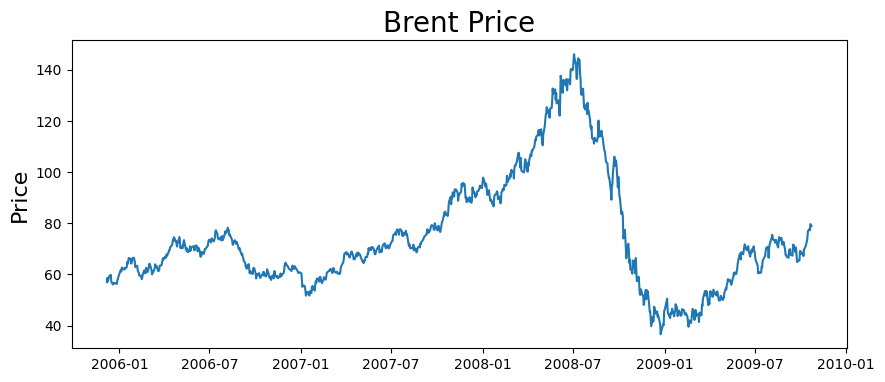

In [232]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.ylabel('Price', fontsize=16)
plt.title('Brent Price', fontsize=20)

## PACF

In [233]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [234]:
perform_adf_test(series)

ADF Statistic: -1.399826
p-value: 0.582359


In [235]:
first_diff = series.diff().dropna()
first_diff

Date
2005-12-08    1.69
2005-12-09   -1.36
2005-12-12    2.13
2005-12-13    0.08
2005-12-14    0.08
              ... 
2009-10-19    0.78
2009-10-20   -0.53
2009-10-21    2.45
2009-10-22   -0.18
2009-10-23   -0.59
Name: Close, Length: 999, dtype: float64

ADF Statistic: -14.609643
p-value: 0.000000


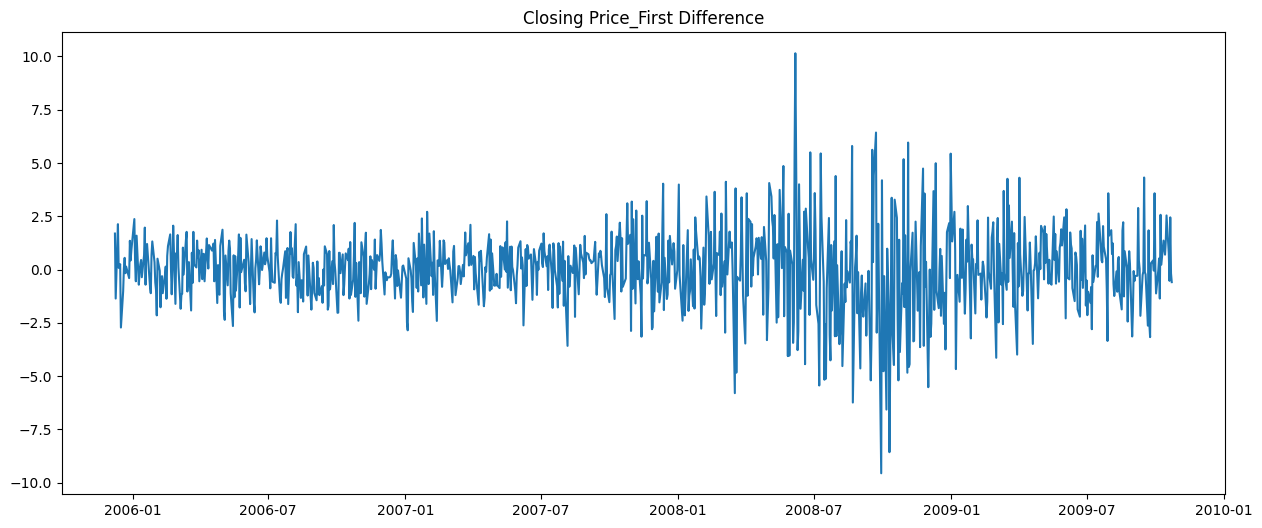

In [248]:
plt.figure(figsize=(15, 6))
plt.title("Closing Price_First Difference")
plt.plot(first_diff, linestyle='-')
perform_adf_test(first_diff)

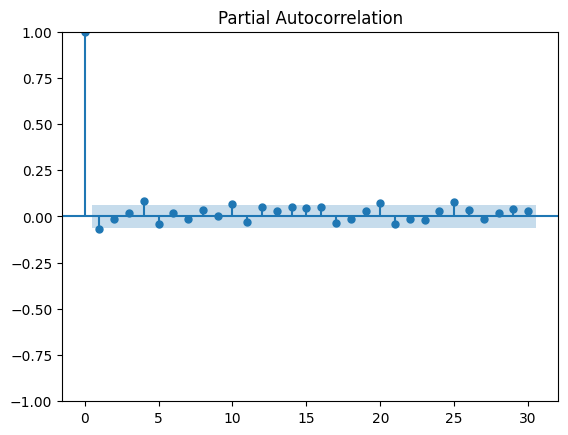

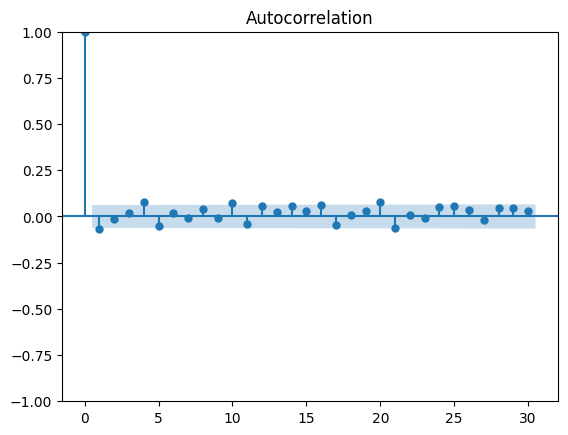

In [237]:
plot_pacf(first_diff)
plot_acf(first_diff)
plt.show()

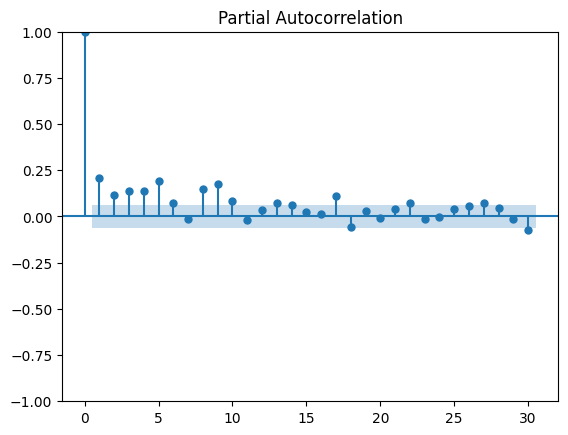

In [238]:
plot_pacf(first_diff**2)
plt.show()

## Fit GARCH(6, 0)

In [239]:
model = arch_model(first_diff, p=6, q=0)

In [240]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 4637.731118420575
Iteration:      2,   Func. Count:     22,   Neg. LLF: 3931.6694076435438
Iteration:      3,   Func. Count:     34,   Neg. LLF: 270693.9586267015
Iteration:      4,   Func. Count:     44,   Neg. LLF: 150021.52257462704
Iteration:      5,   Func. Count:     54,   Neg. LLF: 3818.4703477037647
Iteration:      6,   Func. Count:     64,   Neg. LLF: 7727.990169335802
Iteration:      7,   Func. Count:     74,   Neg. LLF: 2959.753413906745
Iteration:      8,   Func. Count:     84,   Neg. LLF: 2278.505596921979
Iteration:      9,   Func. Count:     94,   Neg. LLF: 2087.3042005013285
Iteration:     10,   Func. Count:    104,   Neg. LLF: 1915.5463694551818
Iteration:     11,   Func. Count:    114,   Neg. LLF: 2019.1076597779797
Iteration:     12,   Func. Count:    124,   Neg. LLF: 1938.2786301944648
Iteration:     13,   Func. Count:    135,   Neg. LLF: 1923.1142122008837
Iteration:     14,   Func. Count:    145,   Neg. LLF: 18

In [241]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1888.99
Distribution:                  Normal   AIC:                           3793.98
Method:            Maximum Likelihood   BIC:                           3833.24
                                        No. Observations:                  999
Date:                Thu, May 09 2024   Df Residuals:                      998
Time:                        16:45:40   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0810  4.691e-02      1.726  8.442e-02 [-1.099e-02,  0.173]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7565      0.123      6.157  7.410e-10    [  0.516,  0.997]
alpha[1]       0.0818  3.678e-02      2.224  2.613e-02  [9.722e-03,  0.154]
alpha[2]       0.0573  3.509e-02      1.633      0.102 [-1.146e-02,  0.126]
alpha[3]       0.1405  4.082e-02      3.441  5.796e-04  [6.045e-02,  0.220]
alpha[4]       0.1438  4.584e-02      3.138  1.702e-03  [5.399e-02,  0.234]
alpha[5]       0.1859  4.975e-02      3.736  1.873e-04  [8.834e-02,  0.283]
alpha[6]       0.1855  6.142e-02      3.020  2.528e-03  [6.510e-02,  0.306]
===========================================================================

Covariance estimator: robust
"""

In [242]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = first_diff[:-(test_size-i)]
    model = arch_model(train, p=6, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=5)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [243]:
rolling_predictions = pd.Series(rolling_predictions, index=series.index[-365:])

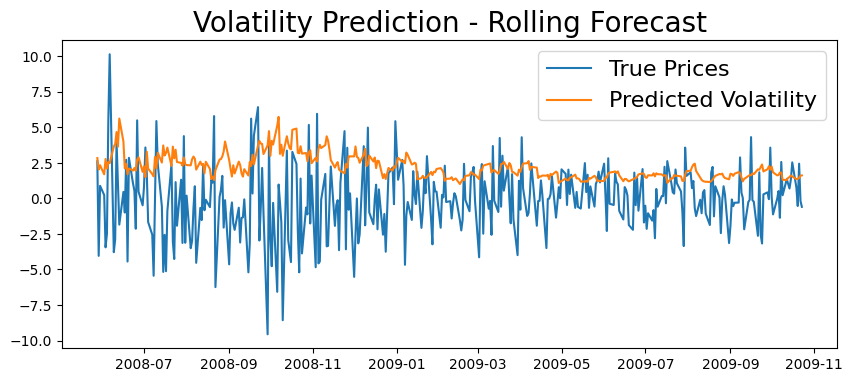

In [244]:
plt.figure(figsize=(10,4))
true, = plt.plot(first_diff[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Prices', 'Predicted Volatility'], fontsize=16)

In [247]:
first_diff

Date
2005-12-08    1.69
2005-12-09   -1.36
2005-12-12    2.13
2005-12-13    0.08
2005-12-14    0.08
              ... 
2009-10-19    0.78
2009-10-20   -0.53
2009-10-21    2.45
2009-10-22   -0.18
2009-10-23   -0.59
Name: Close, Length: 999, dtype: float64

In [245]:
pred = model_fit.forecast(horizon=7)
future_dates = [first_diff.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

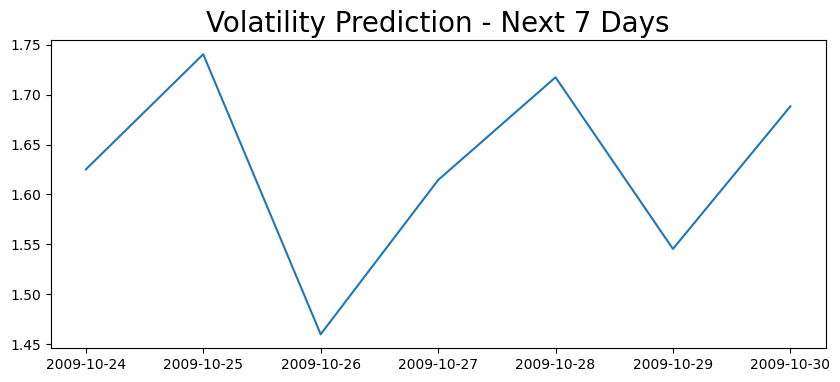

In [246]:

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)